In [1]:
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

from dataset import VideoDataset
from face_detection import FastMTCNN, device
from facenet_pytorch import InceptionResnetV1

# Face Detection

In [2]:
mtcnn = FastMTCNN(image_size=160, margin=0, min_face_size=20,
                          thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True)

# ResNet VGGFace2 for embedding

In [3]:
resnet = InceptionResnetV1(pretrained='vggface2').eval()

# Data Loader

In [4]:
dataset = VideoDataset(root="../DAiSEE/DataSet/", csv="../DAiSEE/Labels/TrainLabels.csv", ttv="Train",
                      face_detector=mtcnn, embedder=resnet)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [5]:
for batch in dataloader:
    break

In [6]:
batch.keys()

dict_keys(['clip_id', 'faces', 'embedding', 'boredom', 'engagement', 'confusion', 'frustration'])

In [7]:
batch["faces"].size() # 2 clips, each is 300 frames (30fps x 10 seconds), face resized to 256x256

torch.Size([2, 300, 3, 160, 160])

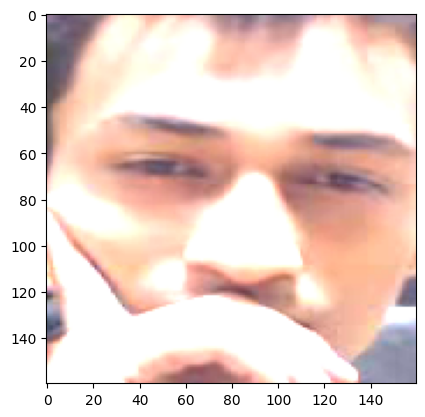

In [12]:
im = np.clip(batch["faces"][1][100].transpose(0, 1).transpose(1, 2).numpy()+1, 0, 1)
plt.imshow(im);

In [9]:
batch["embedding"].size()

torch.Size([2, 300, 512])